In [2]:
import cenpy
from cenpy import products
print(cenpy.__version__)
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import shapely
shapely.speedups.disable()

C:\Users\psle1\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


1.0.1


### Import cenpy data

In [18]:
alameda = products.ACS(2019).from_county('Alameda',level='tract',variables=['B01001_001E',
                                                                            'B17001_001E',
                                                                            'B17001_002E',
                                                                            'B19013_001E',
                                                                            'B25010_001E',
                                                                            'B08012_001E',
                                                                            'B08013_001E',
                                                                           ])


C:\Users\psle1\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1785: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
C:\Users\psle1\anaconda3\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


In [19]:
alameda

,GEOID,geometry,B01001_001E,B08012_001E,B08013_001E,B17001_001E,B17001_002E,B19013_001E,B25010_001E,NAME,state,county,tract
0,06001444400,"POLYGON ((-13585948.070 4513705.770, -13585939...",5477.0,1624.0,54725.0,5477.0,434.0,93094.0,3.60,"Census Tract 4444, Alameda County, California",06,001,444400
1,06001441602,"POLYGON ((-13584453.160 4516975.120, -13584435...",8113.0,2877.0,96855.0,8093.0,270.0,105766.0,3.34,"Census Tract 4416.02, Alameda County, California",06,001,441602
2,06001444302,"POLYGON ((-13593409.480 4510491.890, -13593405...",5185.0,1572.0,49035.0,5185.0,178.0,105188.0,3.45,"Census Tract 4443.02, Alameda County, California",06,001,444302
3,06001444602,"POLYGON ((-13582688.860 4509270.630, -13582631...",4563.0,2311.0,79175.0,4563.0,105.0,128229.0,2.90,"Census Tract 4446.02, Alameda County, California",06,001,444602
4,06001441200,"POLYGON ((-13581697.670 4520696.960, -13581688...",7277.0,2579.0,99810.0,7277.0,320.0,106923.0,2.87,"Census Tract 4412, Alameda County, California",06,001,441200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,06001450750,"POLYGON ((-13566749.690 4537500.610, -13566749...",5630.0,2994.0,122635.0,5630.0,147.0,122309.0,2.46,"Census Tract 4507.50, Alameda County, California",06,001,450750
357,06001451703,"POLYGON ((-13559338.480 4530957.120, -13559338...",4080.0,1969.0,66465.0,4080.0,127.0,155727.0,2.93,"Census Tract 4517.03, Alameda County, California",06,001,451703
358,06001451701,"POLYGON ((-13558187.550 4533932.560, -13558098...",3112.0,1383.0,47285.0,3112.0,121.0,127750.0,2.78,"Census Tract 4517.01, Alameda County, California",06,001,451701
359,06001451102,"POLYGON ((-13559349.720 4530400.880, -13559344...",4003.0,1782.0,58270.0,3981.0,179.0,181458.0,2.93,"Census Tract 4511.02, Alameda County, California",06,001,451102


In [21]:
variables = {
    'B01001_001E': 'total_pop',
    'B17001_001E': 'total_pov',
    'B17001_002E': 'total_pov_below',
    'B19013_001E': 'median_income',
    'B25010_001E': 'household_size',
    'B08012_001E': 'workers_who_commute',
    'B08013_001E': 'agg_travel_time_min',
}

In [23]:
alameda = alameda.rename(columns=variables)

In [24]:
alameda

,GEOID,geometry,total_pop,workers_who_commute,agg_travel_time_min,total_pov,total_pov_below,median_income,household_size,NAME,state,county,tract,land_area
0,06001444400,"POLYGON ((-13585948.070 4513705.770, -13585939...",5477.0,1624.0,54725.0,5477.0,434.0,93094.0,3.60,"Census Tract 4444, Alameda County, California",06,001,444400,0.632172
1,06001441602,"POLYGON ((-13584453.160 4516975.120, -13584435...",8113.0,2877.0,96855.0,8093.0,270.0,105766.0,3.34,"Census Tract 4416.02, Alameda County, California",06,001,441602,1.035220
2,06001444302,"POLYGON ((-13593409.480 4510491.890, -13593405...",5185.0,1572.0,49035.0,5185.0,178.0,105188.0,3.45,"Census Tract 4443.02, Alameda County, California",06,001,444302,13.642951
3,06001444602,"POLYGON ((-13582688.860 4509270.630, -13582631...",4563.0,2311.0,79175.0,4563.0,105.0,128229.0,2.90,"Census Tract 4446.02, Alameda County, California",06,001,444602,3.311337
4,06001441200,"POLYGON ((-13581697.670 4520696.960, -13581688...",7277.0,2579.0,99810.0,7277.0,320.0,106923.0,2.87,"Census Tract 4412, Alameda County, California",06,001,441200,2.003708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,06001450750,"POLYGON ((-13566749.690 4537500.610, -13566749...",5630.0,2994.0,122635.0,5630.0,147.0,122309.0,2.46,"Census Tract 4507.50, Alameda County, California",06,001,450750,1.025727
357,06001451703,"POLYGON ((-13559338.480 4530957.120, -13559338...",4080.0,1969.0,66465.0,4080.0,127.0,155727.0,2.93,"Census Tract 4517.03, Alameda County, California",06,001,451703,1.061881
358,06001451701,"POLYGON ((-13558187.550 4533932.560, -13558098...",3112.0,1383.0,47285.0,3112.0,121.0,127750.0,2.78,"Census Tract 4517.01, Alameda County, California",06,001,451701,0.754838
359,06001451102,"POLYGON ((-13559349.720 4530400.880, -13559344...",4003.0,1782.0,58270.0,3981.0,179.0,181458.0,2.93,"Census Tract 4511.02, Alameda County, California",06,001,451102,2.954349


In [20]:
alameda['land_area'] = alameda.geometry.area*3.86102e-7

In [28]:
alameda['land_area'].sum()

1312.2278466904934

In [26]:
alameda['total_pop']/alameda['land_area'] 

0      8663.782881
1      7836.979332
2       380.049732
3      1377.993242
4      3631.767132
          ...     
356    5488.789774
357    3842.240122
358    4122.738929
359    1354.951768
360    6857.096023
Length: 361, dtype: float64

In [4]:
alameda = products.ACS(2019).from_county('Alameda',level='tract',variables=['B01001_001E',
                                                                            'B17001_001E',
                                                                            'B17001_002E',
                                                                            'B19013_001E',
                                                                            'B25010_001E',
                                                                            'B08012_001E',
                                                                            'B08013_001E',
                                                                            'DENSITY_2019'
                                                                           ])


C:\Users\psle1\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1785: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
C:\Users\psle1\anaconda3\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


In [5]:
variables = {
    'B01001_001E': 'total_pop',
    'B17001_001E': 'total_pov',
    'B17001_002E': 'total_pov_below',
    'B19013_001E': 'median_income',
    'B25010_001E': 'household_size',
    'B08012_001E': 'workers_who_commute',
    'B08013_001E': 'agg_travel_time_min',
    'DENSITY_2019': 'population_density'
}

In [6]:
alameda = alameda.rename(columns=variables)

In [7]:
alameda

,GEOID,geometry,total_pop,workers_who_commute,agg_travel_time_min,total_pov,total_pov_below,median_income,household_size,B25105_001E,NAME,state,county,tract
0,06001444400,"POLYGON ((-13585948.070 4513705.770, -13585939...",5477.0,1624.0,54725.0,5477.0,434.0,93094.0,3.60,2297.0,"Census Tract 4444, Alameda County, California",06,001,444400
1,06001441602,"POLYGON ((-13584453.160 4516975.120, -13584435...",8113.0,2877.0,96855.0,8093.0,270.0,105766.0,3.34,2303.0,"Census Tract 4416.02, Alameda County, California",06,001,441602
2,06001444302,"POLYGON ((-13593409.480 4510491.890, -13593405...",5185.0,1572.0,49035.0,5185.0,178.0,105188.0,3.45,2143.0,"Census Tract 4443.02, Alameda County, California",06,001,444302
3,06001444602,"POLYGON ((-13582688.860 4509270.630, -13582631...",4563.0,2311.0,79175.0,4563.0,105.0,128229.0,2.90,2365.0,"Census Tract 4446.02, Alameda County, California",06,001,444602
4,06001441200,"POLYGON ((-13581697.670 4520696.960, -13581688...",7277.0,2579.0,99810.0,7277.0,320.0,106923.0,2.87,2203.0,"Census Tract 4412, Alameda County, California",06,001,441200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,06001450750,"POLYGON ((-13566749.690 4537500.610, -13566749...",5630.0,2994.0,122635.0,5630.0,147.0,122309.0,2.46,2681.0,"Census Tract 4507.50, Alameda County, California",06,001,450750
357,06001451703,"POLYGON ((-13559338.480 4530957.120, -13559338...",4080.0,1969.0,66465.0,4080.0,127.0,155727.0,2.93,2834.0,"Census Tract 4517.03, Alameda County, California",06,001,451703
358,06001451701,"POLYGON ((-13558187.550 4533932.560, -13558098...",3112.0,1383.0,47285.0,3112.0,121.0,127750.0,2.78,2373.0,"Census Tract 4517.01, Alameda County, California",06,001,451701
359,06001451102,"POLYGON ((-13559349.720 4530400.880, -13559344...",4003.0,1782.0,58270.0,3981.0,179.0,181458.0,2.93,2907.0,"Census Tract 4511.02, Alameda County, California",06,001,451102


### Calculate variables

* Area of census tracts
* Vehicles available
* Percentage of population below poverty line
* Percentage of population that is white
* Percentage of population that is non-white

In [140]:
alameda['land_area'],alameda['veh_avail_avg'],alameda['pct_poverty'],alameda['pct_white'],alameda['pct_non_white'] = [
    alameda.geometry.area*3.86102e-7,
    (1*alameda['veh_avail_1'] + 2*alameda['veh_avail_2'] + 3*alameda['veh_avail_3p'])/(alameda['veh_avail_none']+alameda['veh_avail_1']+alameda['veh_avail_2']+alameda['veh_avail_3p']),
    alameda['total_pov_below']/alameda['total_pov'],
    alameda['race_white']/alameda['total_pop'],
    (alameda['total_pop']-alameda['race_white'])/alameda['total_pop']
]

* Percentage of population above 25 with bachelors degree or higher
* Percentage of population with housing cost greater than 30% of income
* Average travel time for workers that commute
* Percentage of population age 25-45
* Percentage of population employed

In [141]:
alameda['pct_bach_higher'],alameda['pct_housing_cost_gt_30_pct'],alameda['avg_travel_time_min'],alameda['pct_pop_25_45'],alameda['pct_employed']=[
    alameda['bach_higher_25_plus']/alameda['tot_25_plus'],
    (alameda['owner_cost_gt_30_pct_br_1']+alameda['owner_cost_gt_30_pct_br_2']+alameda['owner_cost_gt_30_pct_br_3']+alameda['owner_cost_gt_30_pct_br_4']+alameda['owner_cost_gt_30_pct_br_5']+alameda['renter_cost_gt_30_pct_br_1']+alameda['renter_cost_gt_30_pct_br_2']+alameda['renter_cost_gt_30_pct_br_3']+alameda['renter_cost_gt_30_pct_br_4']+alameda['renter_cost_gt_30_pct_br_5'])/alameda['housing_total'],
    alameda['agg_travel_time_min']/alameda['workers_who_commute'],
    (alameda['male_25_29']+alameda['male_30_34']+alameda['male_35_39']+alameda['male_40_44']+alameda['female_25_29']+alameda['female_30_34']+alameda['female_35_39']+alameda['female_40_44'])/alameda['total_pop'],
    alameda['employed']/alameda['labor_force']
]

### Get more accurate numbers for census tract area: load and join data downloaded from https://tigerweb.geo.census.gov and parsed by 'parse_html.ipynb'

In [142]:
alameda_geog=pd.read_csv('./alameda-geog.csv', usecols = ['TRACT','AREALAND']).dropna()

In [143]:
alameda_geog['AREALAND'] = pd.to_numeric(alameda_geog['AREALAND'],errors='coerce')

In [144]:
land_area = alameda_geog.groupby('TRACT').sum()

In [145]:
area = []
for i in range(len(alameda)):
    try:
        x = land_area.AREALAND[int(alameda.tract[i])]*3.86102e-7
    except:
        x = 0
    area.append(x)

In [146]:
for i in range(len(alameda)):
    if(area[i] != 0):
        alameda['land_area'][i] = area[i]

/var/folders/4g/fv730p497vjcd2_c9ym9lg7r0000gn/T/ipykernel_82074/595609918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alameda['land_area'][i] = area[i]


In [147]:
alameda["pop_density"]=alameda["total_pop"]/alameda["land_area"]

In [148]:
alameda.head()

,GEOID,geometry,total_pop,male_25_29,male_30_34,male_35_39,male_40_44,female_25_29,female_30_34,female_35_39,...,veh_avail_avg,pct_poverty,pct_white,pct_non_white,pct_bach_higher,pct_housing_cost_gt_30_pct,avg_travel_time_min,pct_pop_25_45,pct_employed,pop_density
0,06001444400,"POLYGON ((-13585948.070 4513705.770, -13585939...",5477.0,134.0,228.0,255.0,193.0,75.0,241.0,206.0,...,2.295876,0.079240,0.203213,0.796787,0.121979,0.439763,33.697660,0.270769,0.948406,13802.288196
1,06001441602,"POLYGON ((-13584453.160 4516975.120, -13584435...",8113.0,206.0,380.0,402.0,399.0,372.0,355.0,421.0,...,2.264933,0.033362,0.264760,0.735240,0.252827,0.330846,33.665276,0.341674,0.986035,12492.015645
2,06001444302,"POLYGON ((-13593409.480 4510491.890, -13593405...",5185.0,235.0,371.0,241.0,170.0,206.0,197.0,211.0,...,2.423507,0.034330,0.199807,0.800193,0.195592,0.458000,31.192748,0.352555,0.973022,380.049732
3,06001444602,"POLYGON ((-13582688.860 4509270.630, -13582631...",4563.0,256.0,227.0,367.0,136.0,369.0,327.0,114.0,...,2.193012,0.023011,0.219154,0.780846,0.380040,0.258413,34.260061,0.432172,0.962923,2103.278611
4,06001441200,"POLYGON ((-13581697.670 4520696.960, -13581688...",7277.0,173.0,190.0,203.0,458.0,194.0,220.0,397.0,...,2.317425,0.043974,0.421053,0.578947,0.344574,0.371326,38.701047,0.308644,0.957933,5802.714826


In [149]:
alameda_pm=pd.read_csv('./Daily_Census_Tract-Level_PM2.5_Concentrations__2016.csv', usecols = ['ctfips','DS_PM_pred'])

In [150]:
alameda_pm_avg=alameda_pm.groupby('ctfips').mean()
alameda_pm_med=alameda_pm.groupby('ctfips').median()

In [151]:
pm_avg = []
pm_med = []
pm_bad_days = []
for i in range(len(alameda)):
    try:
        y = alameda_pm_avg.DS_PM_pred[int(alameda.GEOID[i])]
    except:
        y = None
    try:
        z = alameda_pm_med.DS_PM_pred[int(alameda.GEOID[i])]
    except:
        z = None
    pm_avg.append(y)
    pm_med.append(z)
alameda['PM_2.5_avg'] = pm_avg
alameda['PM_2.5_med'] = pm_med

### Save to CSV

In [154]:
alameda.to_csv("./alameda_census_dataset.csv")

### Plot variables

<AxesSubplot:title={'center':'Alameda County - Means of transportation to work by average number of vehicles available'}>

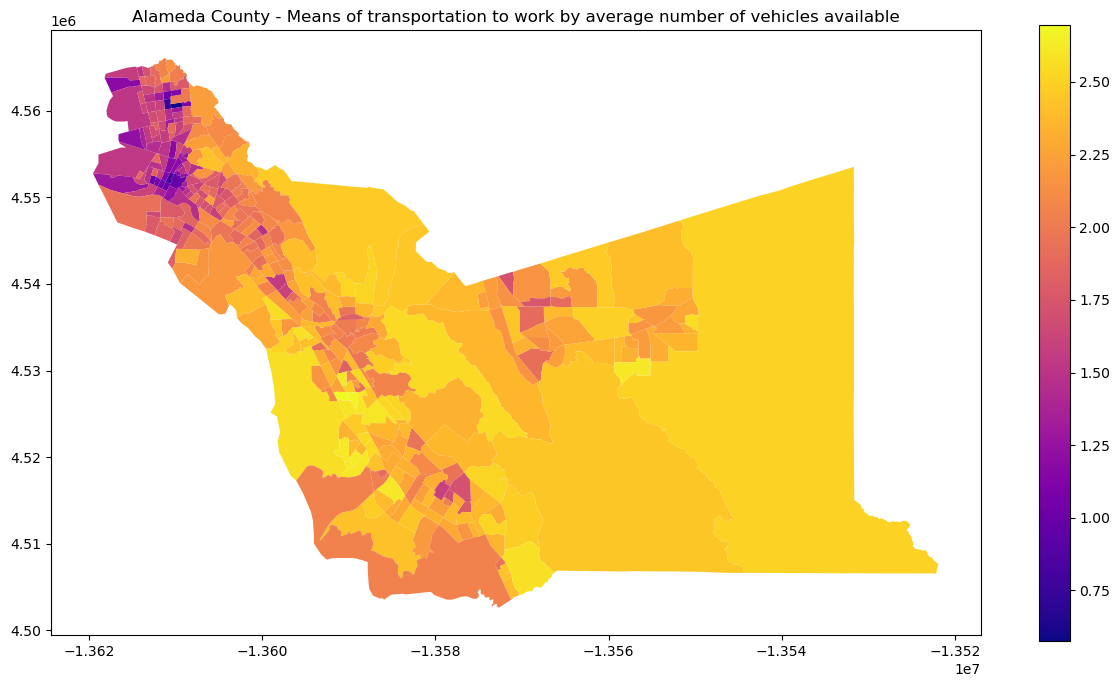

In [155]:
f, ax = plt.subplots(1,1,figsize=(15,8))
ax.set_title("Alameda County - Means of transportation to work by average number of vehicles available")
alameda.dropna(subset=['veh_avail_avg'], axis=0).plot('veh_avail_avg', ax=ax, cmap='plasma',legend=True)

<AxesSubplot:title={'center':'Alameda County - Population density (persons per square mile)'}>

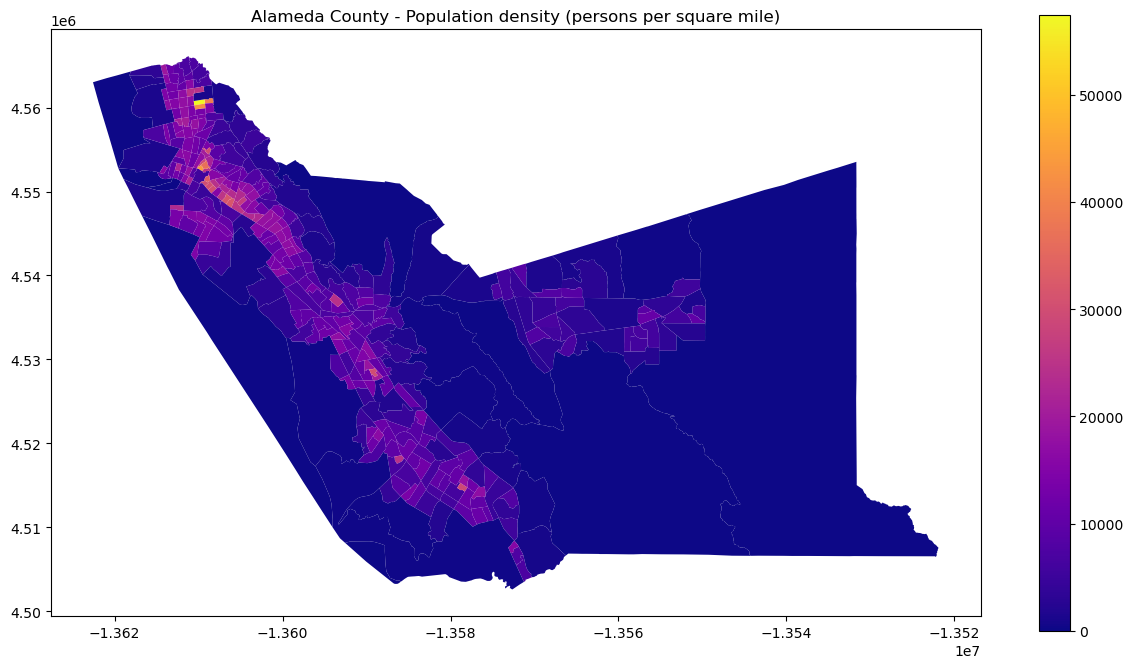

In [156]:
f, ax = plt.subplots(1,1,figsize=(15,8))
ax.set_title("Alameda County - Population density (persons per square mile)")
alameda.dropna(subset=['pop_density'], axis=0).plot('pop_density', ax=ax, cmap='plasma',legend=True)

<AxesSubplot:title={'center':'Alameda County - Percentage of population with income at or below poverty line'}>

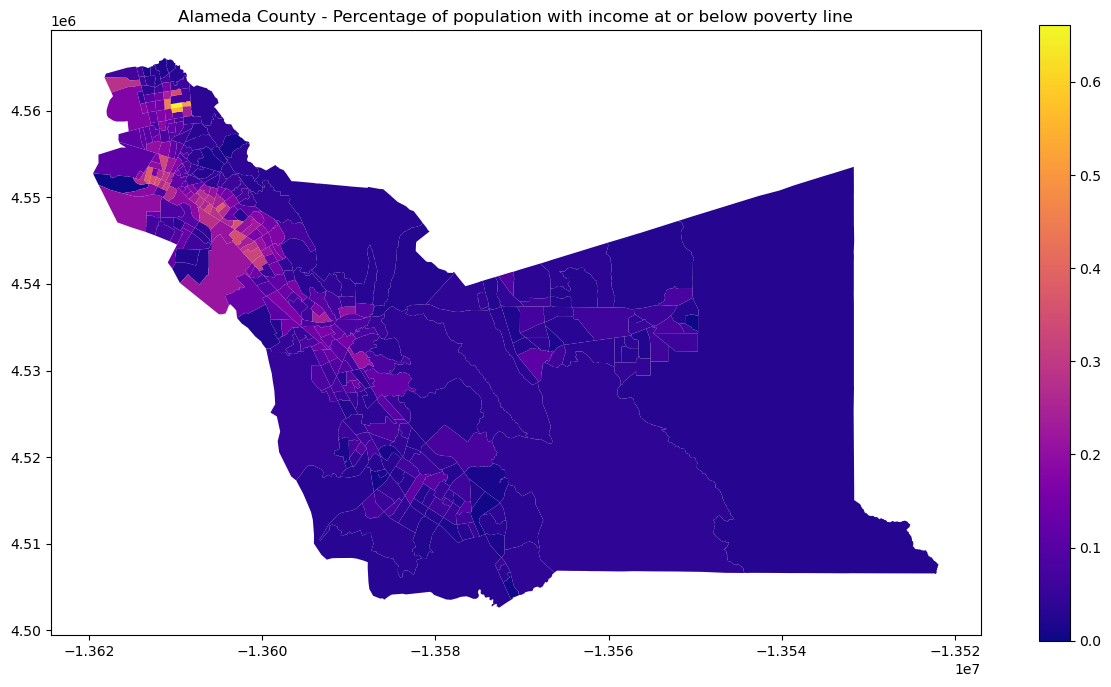

In [157]:
f, ax = plt.subplots(1,1,figsize=(15,8))
ax.set_title("Alameda County - Percentage of population with income at or below poverty line")
alameda.dropna(subset=['pct_poverty'], axis=0).plot('pct_poverty', ax=ax, cmap='plasma',legend=True)

<AxesSubplot:title={'center':'Alameda County - Percentage of population above 25 with bachelors degree or higher'}>

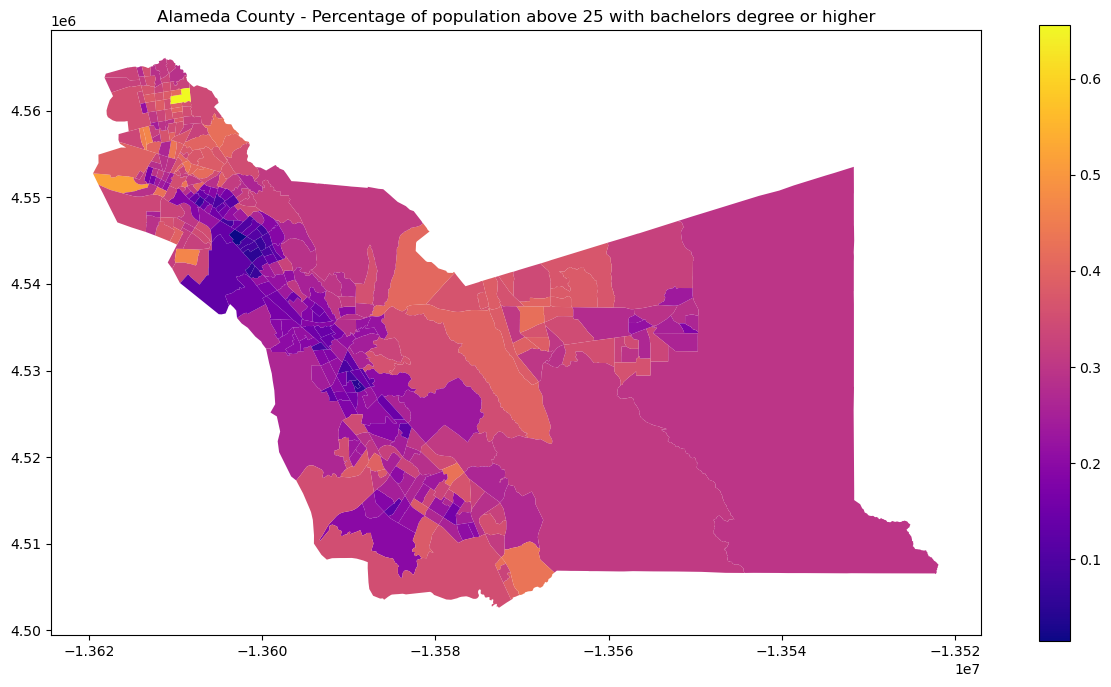

In [158]:
f, ax = plt.subplots(1,1,figsize=(15,8))
ax.set_title("Alameda County - Percentage of population above 25 with bachelors degree or higher")
alameda.dropna(subset=['pct_bach_higher'], axis=0).plot('pct_bach_higher', ax=ax, cmap='plasma',legend=True)

<AxesSubplot:title={'center':'Alameda County - Median household income in the past 12 months (in 2019 inflation-adjusted dollars)'}>

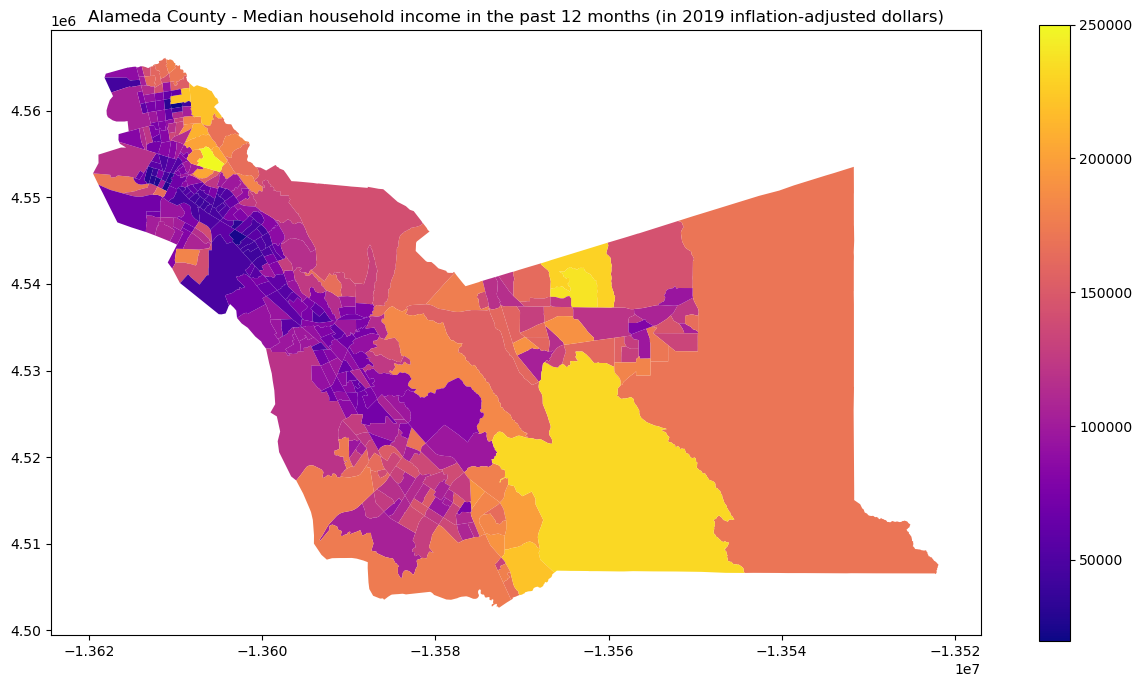

In [159]:
f, ax = plt.subplots(1,1,figsize=(15,8))
ax.set_title("Alameda County - Median household income in the past 12 months (in 2019 inflation-adjusted dollars)")
alameda.dropna(subset=['median_income'], axis=0).plot('median_income', ax=ax, cmap='plasma',legend=True)

<AxesSubplot:title={'center':'Alameda County - Average household size'}>

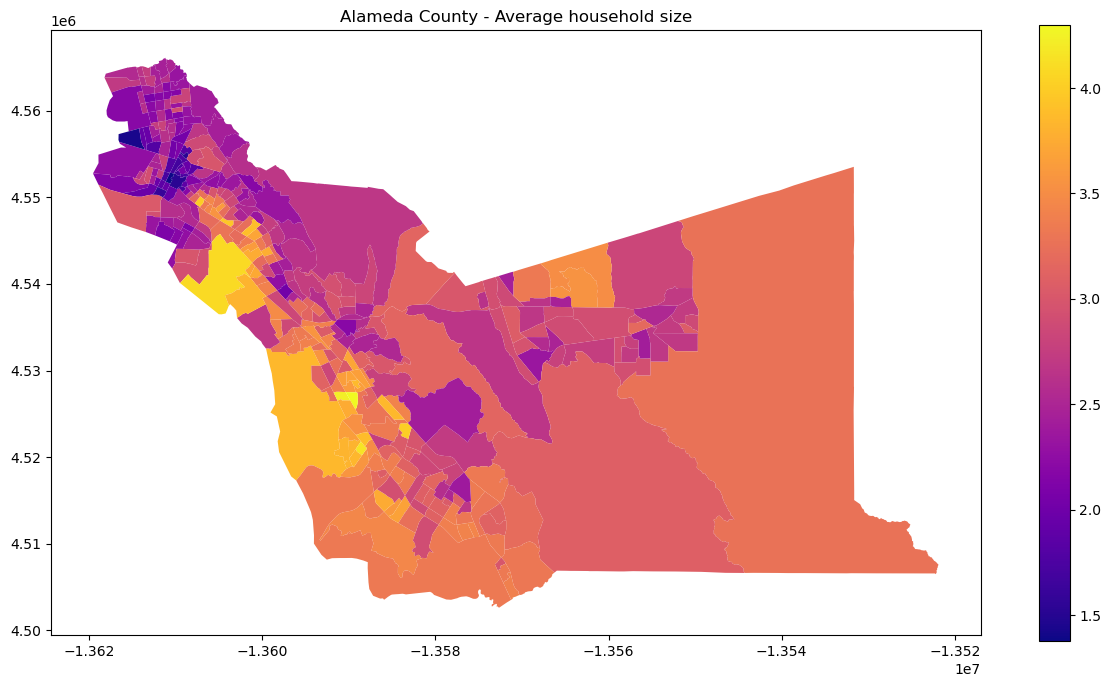

In [160]:
f, ax = plt.subplots(1,1,figsize=(15,8))
ax.set_title("Alameda County - Average household size")
alameda.dropna(subset=['household_size'], axis=0).plot('household_size', ax=ax, cmap='plasma',legend=True)

<AxesSubplot:title={'center':'Alameda County - Percentage of population that spend more than 30% of monthly income on housing'}>

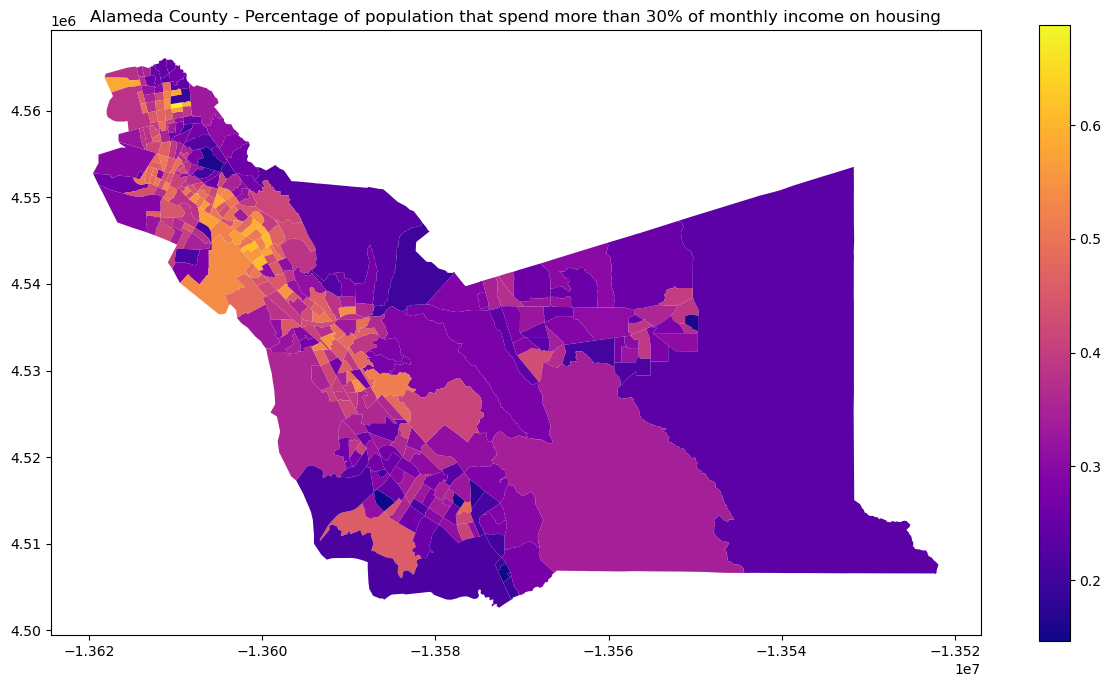

In [161]:
f, ax = plt.subplots(1,1,figsize=(15,8))
ax.set_title("Alameda County - Percentage of population that spend more than 30% of monthly income on housing")
alameda.dropna(subset=['pct_housing_cost_gt_30_pct'], axis=0).plot('pct_housing_cost_gt_30_pct', ax=ax, cmap='plasma',legend=True)

<AxesSubplot:title={'center':'Alameda County - Average travel time to work (minutes)'}>

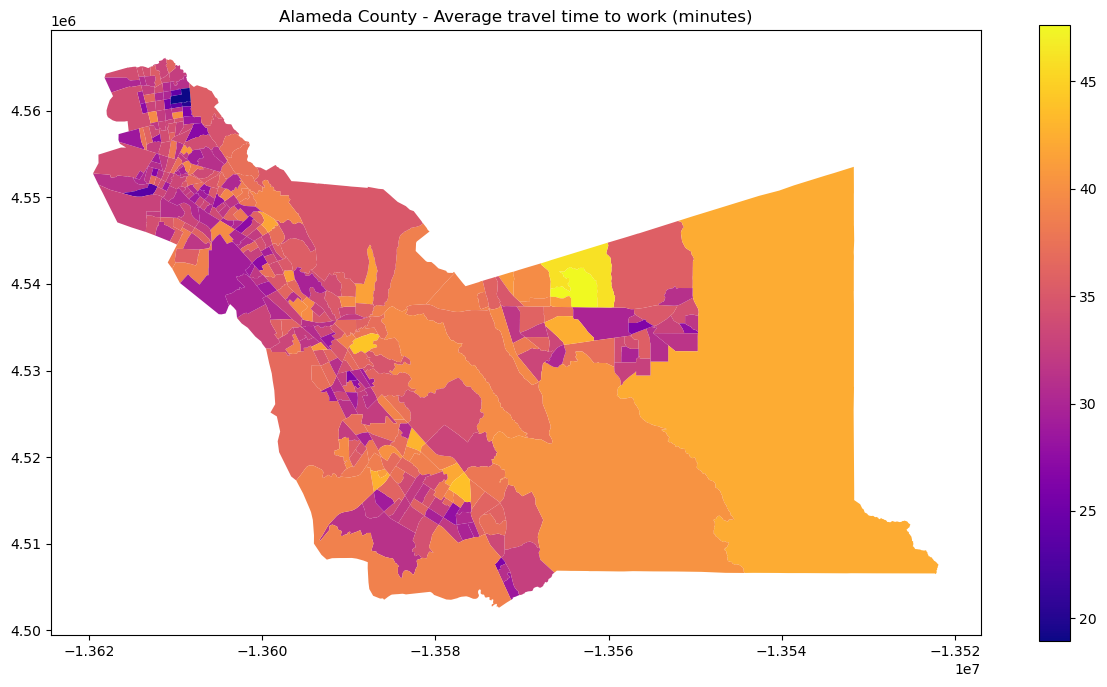

In [162]:
f, ax = plt.subplots(1,1,figsize=(15,8))
ax.set_title("Alameda County - Average travel time to work (minutes)")
alameda.dropna(subset=['avg_travel_time_min'], axis=0).plot('avg_travel_time_min', ax=ax, cmap='plasma',legend=True)

<AxesSubplot:title={'center':'Alameda County - Percentage of population that is age 25-45'}>

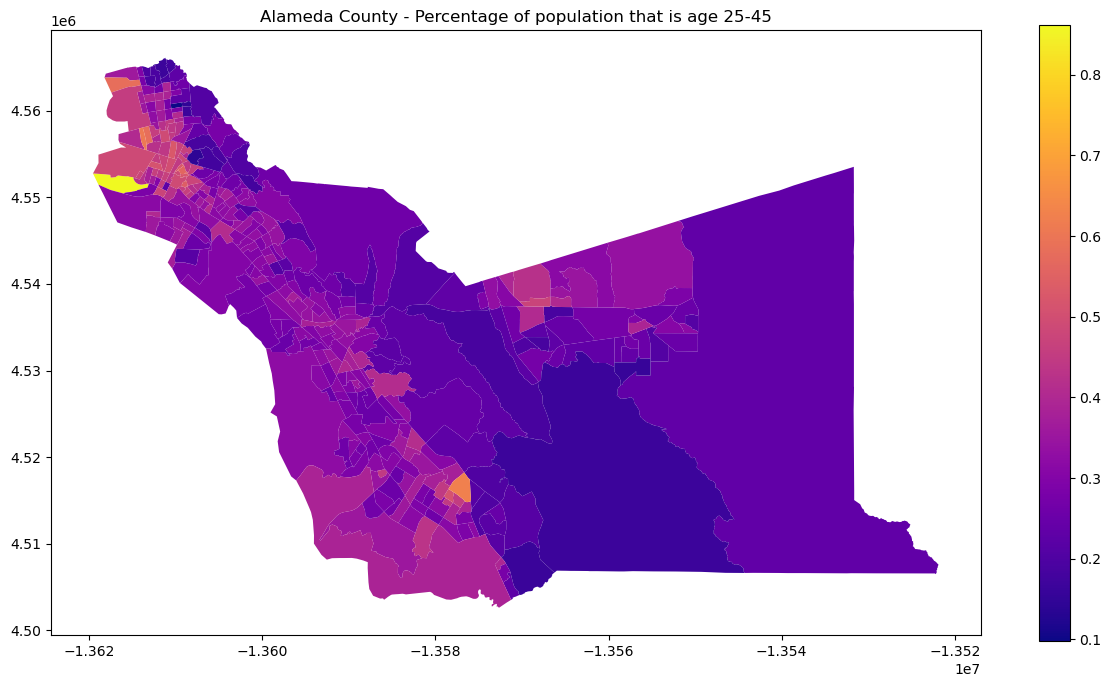

In [163]:
f, ax = plt.subplots(1,1,figsize=(15,8))
ax.set_title("Alameda County - Percentage of population that is age 25-45")
alameda.dropna(subset=['pct_pop_25_45'], axis=0).plot('pct_pop_25_45', ax=ax, cmap='plasma',legend=True)

<AxesSubplot:title={'center':'Alameda County - Percentage of population in the labor force that is employed'}>

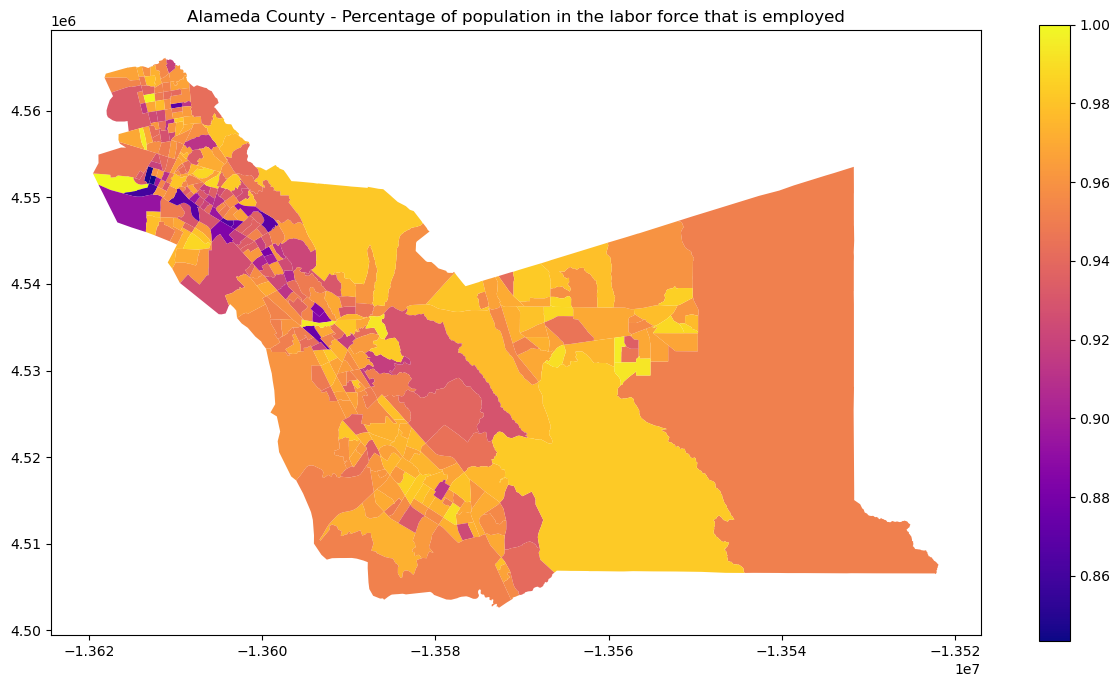

In [164]:
f, ax = plt.subplots(1,1,figsize=(15,8))
ax.set_title("Alameda County - Percentage of population in the labor force that is employed")
alameda.dropna(subset=['pct_employed'], axis=0).plot('pct_employed', ax=ax, cmap='plasma',legend=True)

<AxesSubplot:title={'center':'Alameda County - Percentage of population that is white only'}>

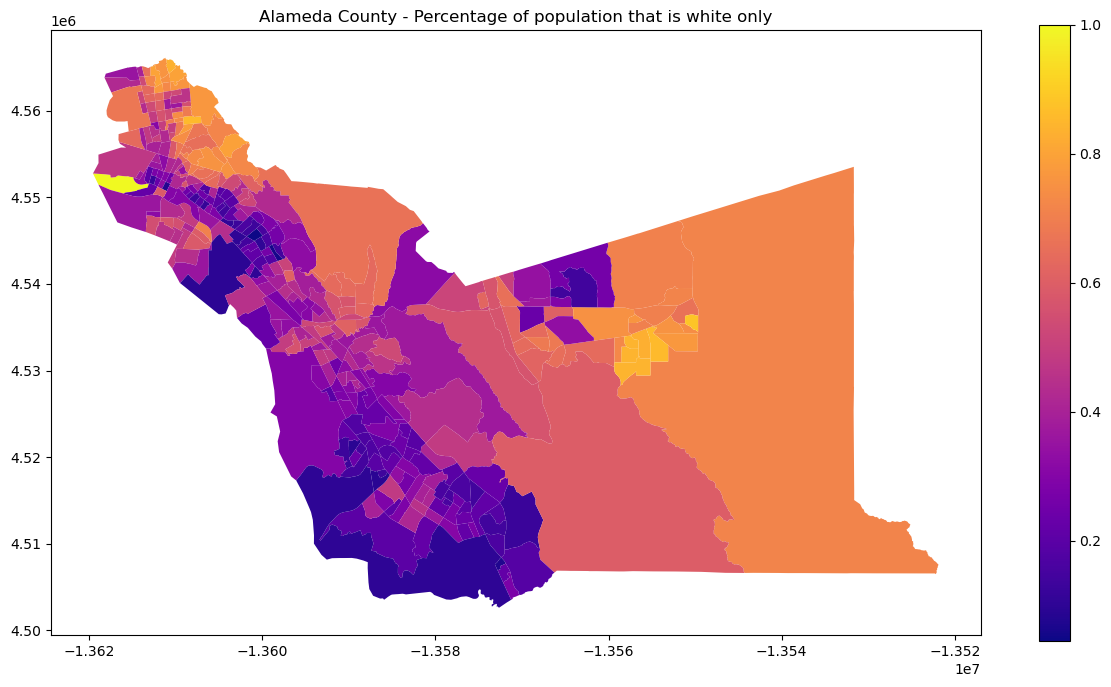

In [165]:
f, ax = plt.subplots(1,1,figsize=(15,8))
ax.set_title("Alameda County - Percentage of population that is white only")
alameda.dropna(subset=['pct_white'], axis=0).plot('pct_white', ax=ax, cmap='plasma',legend=True)

<AxesSubplot:title={'center':'Alameda County - Percentage of population that is not white only'}>

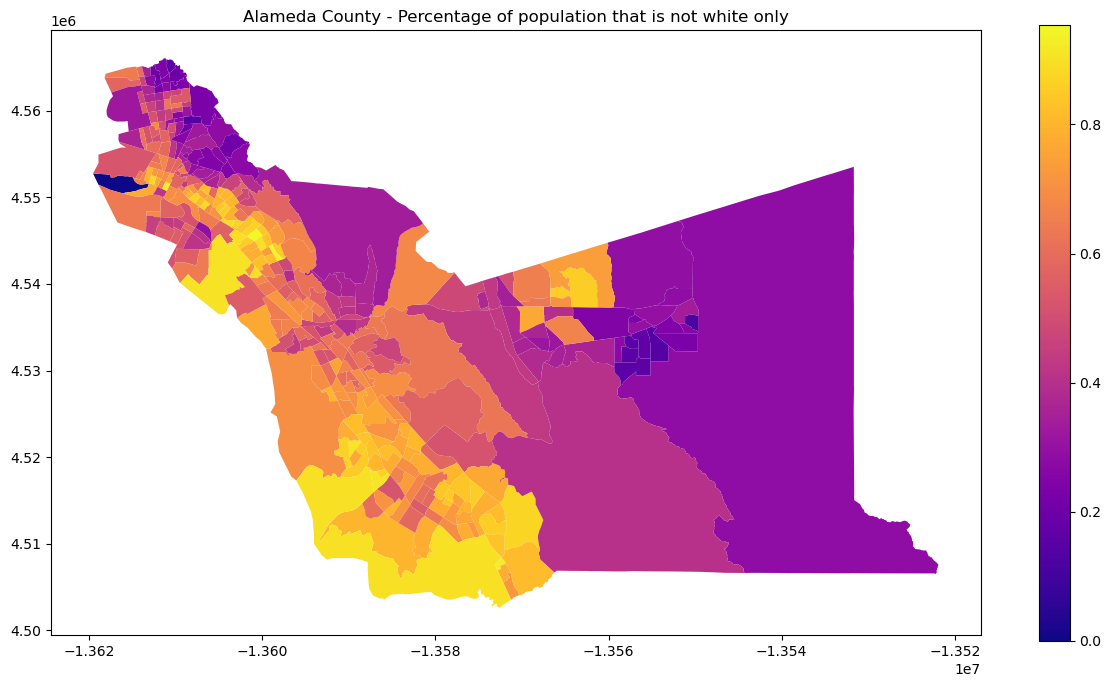

In [166]:
f, ax = plt.subplots(1,1,figsize=(15,8))
ax.set_title("Alameda County - Percentage of population that is not white only")
alameda.dropna(subset=['pct_non_white'], axis=0).plot('pct_non_white', ax=ax, cmap='plasma',legend=True)

<AxesSubplot:title={'center':'Alameda County - Average daily PM 2.5 Concentration 2016 $\\mu g/m^3$'}>

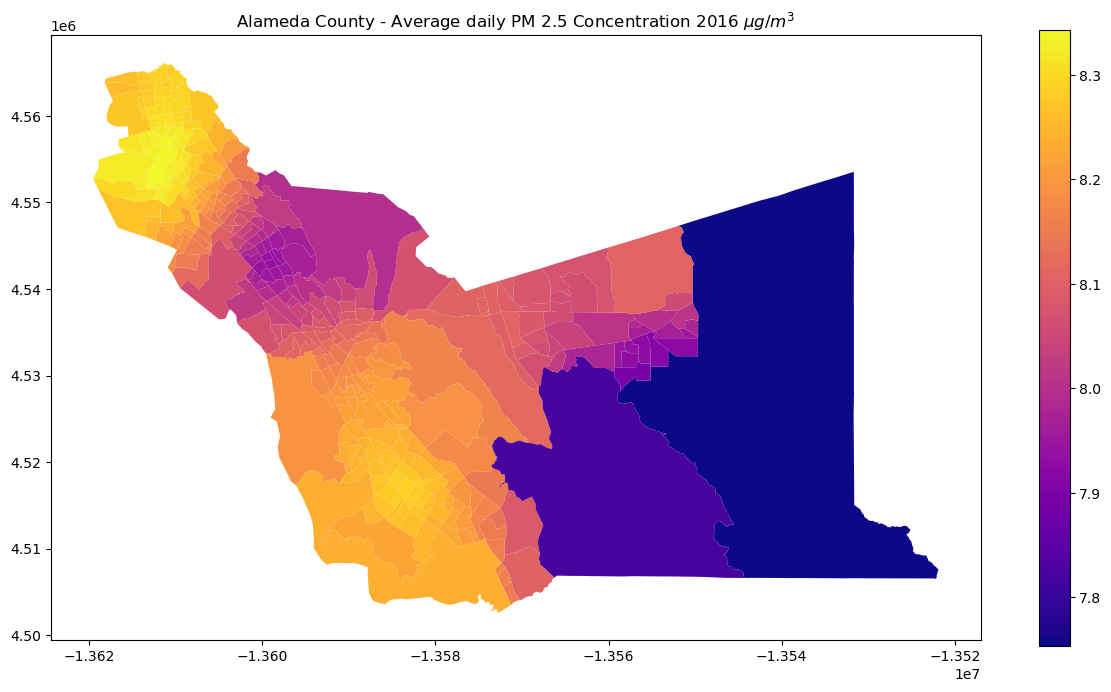

In [167]:
f, ax = plt.subplots(1,1,figsize=(15,8))
ax.set_title(r"Alameda County - Average daily PM 2.5 Concentration 2016 $\mu g/m^3$")
alameda.dropna(subset=['PM_2.5_avg'], axis=0).plot('PM_2.5_avg', ax=ax, cmap='plasma',legend=True)

<AxesSubplot:title={'center':'Alameda County - Median daily PM 2.5 Concentration 2016 $\\mu g/m^3$'}>

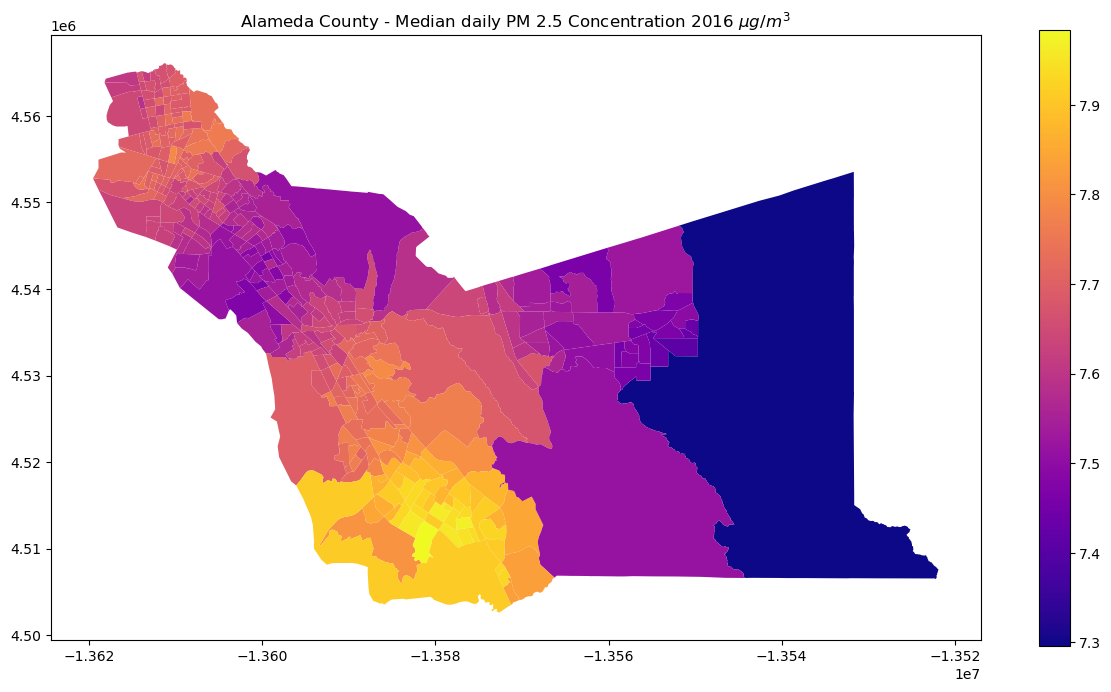

In [168]:
f, ax = plt.subplots(1,1,figsize=(15,8))
ax.set_title(r"Alameda County - Median daily PM 2.5 Concentration 2016 $\mu g/m^3$")
alameda.dropna(subset=['PM_2.5_med'], axis=0).plot('PM_2.5_med', ax=ax, cmap='plasma',legend=True)

Checking values...

In [170]:
total_area = 0
total_pop = 0
total_white = 0
total_black = 0
total_am_ind = 0
total_asian = 0
total_hi_pi = 0
total_other = 0
total_2_plus = 0
for i in range(len(alameda)):
    total_area += alameda.land_area[i]
    total_pop += alameda.total_pop[i]
    total_white += alameda.race_white[i]
    total_black += alameda.race_black[i]
    total_am_ind += alameda.race_am_ind[i]
    total_asian += alameda.race_asian[i]
    total_hi_pi += alameda.race_hi_pi[i]
    total_other += alameda.race_other[i]
    total_2_plus += alameda.race_2_plus[i]
print(total_area, total_pop,total_white/total_pop, sum([total_white,total_black,total_am_ind,total_asian,total_hi_pi,total_other,total_2_plus]))

966.7971770309255 1656754.0 0.4046249473367802 1656754.0
